# Watching distance between matched objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import GCRCatalogs
from GCRCatalogs.helpers.tract_catalogs import tract_filter, sample_filter
from GCRCatalogs import GCRQuery
import numpy as np
from matplotlib.patches import Rectangle
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.io import ascii
import sys
import os
import shutil
import pickle
import healpy as hp
import h5py
import pandas as pd

###clevar
import clevar
from clevar import ClCatalog
from clevar.match import ProximityMatch
from clevar.match_metrics import scaling
from clevar.match_metrics import recovery
from clevar.match_metrics import distances
from clevar.match import get_matched_pairs
from clevar.match import output_matched_catalog
from clevar.cosmology import AstroPyCosmology
cosmo = AstroPyCosmology()

In [2]:
outpath = '/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/outfiles_1013/'
cdc = ClCatalog.read_full(outpath + 'cdc.fits') #cosmoDC2_small matched table
cam = ClCatalog.read_full(outpath + 'cam.fits') #amico matched table
mt1, mt2 = get_matched_pairs(cdc, cam, 'cross')
c_merged = ClCatalog.read(outpath +'output_catalog.fits', 'merged',  tags = {'z_halo' : 'cat1_z', 'z_amico' : 'cat2_z', 'richness' : 'cat2_richness', 'mass' : 'cat1_mass', 'SN' : 'cat2_SN'})

    * ClEvar used in matching: 0.13.8
    * ClEvar used in matching: 0.13.8


/sps/lsst/users/namourou/conda_clone_210223/descv1.1/clevar/clevar/catalog.py:267: UserWarning: id column missing, additional one is being created.
  warnings.warn(


### Distance in Mpc in redshift bins

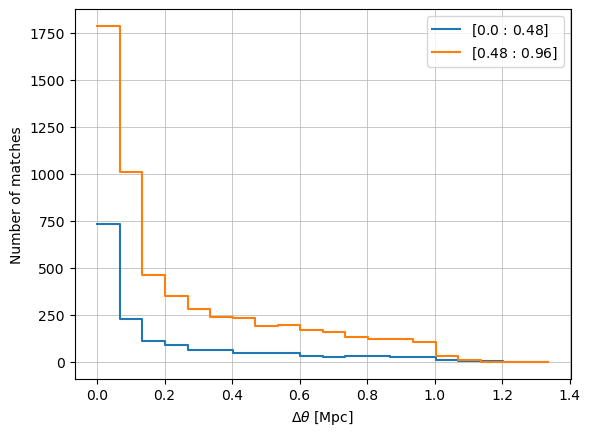

In [3]:
zbins = np.linspace(0, 1.2, 11)
from clevar.match_metrics.distances import ClCatalogFuncs as d_cf
info = d_cf.central_position(cdc, cam, 'cross', radial_bins=20, radial_bin_units='mpc',
                           col2='z', bins2=zbins[::4], cosmo = cosmo)
#info = d_cf.central_position(cdc, cam, 'cross', radial_bins=20, radial_bin_units='mpc', cosmo = cosmo) #Without redshift bins


### Same but in mass bins

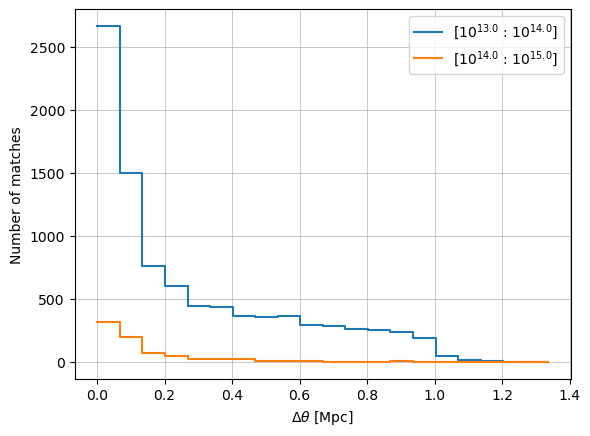

In [5]:
mbins = np.logspace(13, 15, 3)
info = distances.central_position(
    cdc, cam, 'cross', radial_bins=20, radial_bin_units='mpc',
    quantity_bins='mass', bins=mbins, log_quantity=True, cosmo = cosmo)

### Redshift distances

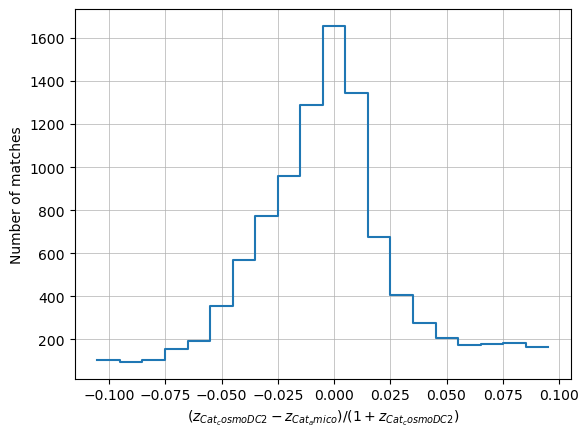

In [6]:
info = d_cf.redshift(cdc, cam, 'cross', redshift_bins=20, normalize='cat1')

We can notice that when we defined mathing parametters, we said that z_dist can't be over 0.1 but here when we check redshift we see that in the binning we get distances < 0.1.
This is due to binning when loading the catalogs, it seems that all z distances are shifted to the right due to binning

### Redshift distances in redshift binning

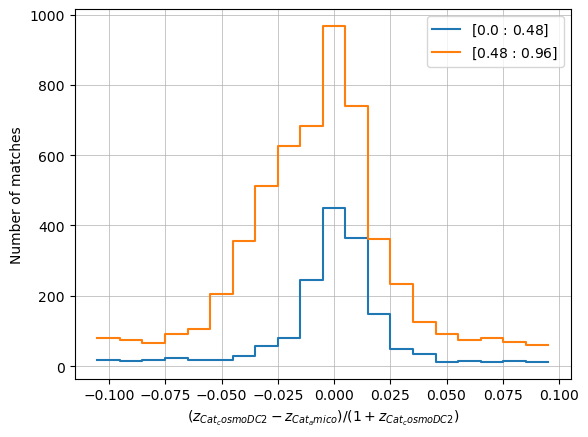

In [7]:
info = d_cf.redshift(cdc, cam, 'cross', redshift_bins=20,
                   col2='z', bins2=zbins[::4], normalize='cat1')